# **Exploratory analysis - Second step: data processing**

In [1]:
import sys
sys.path.append('../src') 

from data_processing import *

## **1.) Data loading**

In [2]:
data = pd.read_csv("../data/results_parsing.csv")

In [3]:
# Configure display to show all columns
pd.set_option('display.max_columns', None)

# Show the first 6 rows with all columns
data.head(6)

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,dryWeight_lb,hullMaterial,fuelType,numEngines,totalHP,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,1,7252689,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,3000.0,fiberglass,gasoline,1,150.0,outboard-4s,16500.0,217053,Englewood,FL,34224,2019-10-16,10,2019
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,16100.0,fiberglass,diesel,2,800.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,2019-09-24,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,2000.0,fiberglass,gasoline,1,75.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2019-11-02,11,2019
3,6,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,12650.0,fiberglass,gasoline,2,600.0,multiple,169995.0,34834,North Charleston,SC,29405,2019-09-19,9,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,32000.0,fiberglass,diesel,2,700.0,inboard,109900.0,17942,Middle River,MD,21220,2018-08-29,8,2018
5,9,7240180,power,power-cruiser,Azimut,43,2019,used,43.0,13.92,29650.0,fiberglass,diesel,2,800.0,multiple,625000.0,28771,Miami,FL,33140,2019-10-04,10,2019


In [4]:
initial_rows = data.shape[0]
initial_columns= data.shape[1]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18903 non-null  int64  
 1   id              18903 non-null  int64  
 2   type            18903 non-null  object 
 3   boatClass       18903 non-null  object 
 4   make            18903 non-null  object 
 5   model           18903 non-null  object 
 6   year            18903 non-null  int64  
 7   condition       18903 non-null  object 
 8   length_ft       18903 non-null  float64
 9   beam_ft         18903 non-null  float64
 10  dryWeight_lb    18903 non-null  float64
 11  hullMaterial    18903 non-null  object 
 12  fuelType        18903 non-null  object 
 13  numEngines      18903 non-null  int64  
 14  totalHP         18903 non-null  float64
 15  engineCategory  18903 non-null  object 
 16  price           18903 non-null  float64
 17  sellerId        18903 non-null 

## **2.) Exploratory data analysis**

### **Numerical features**

* **Remove features unnecesary of dataset**

In [6]:
# List of features to remove
features_to_remove = ['Unnamed: 0', 'id', 'sellerId']

# Remove the specified features from the DataFrame
data = data.drop(features_to_remove, axis=1)

In [7]:
data.shape

(18903, 21)

* **Histograms of numerical features**

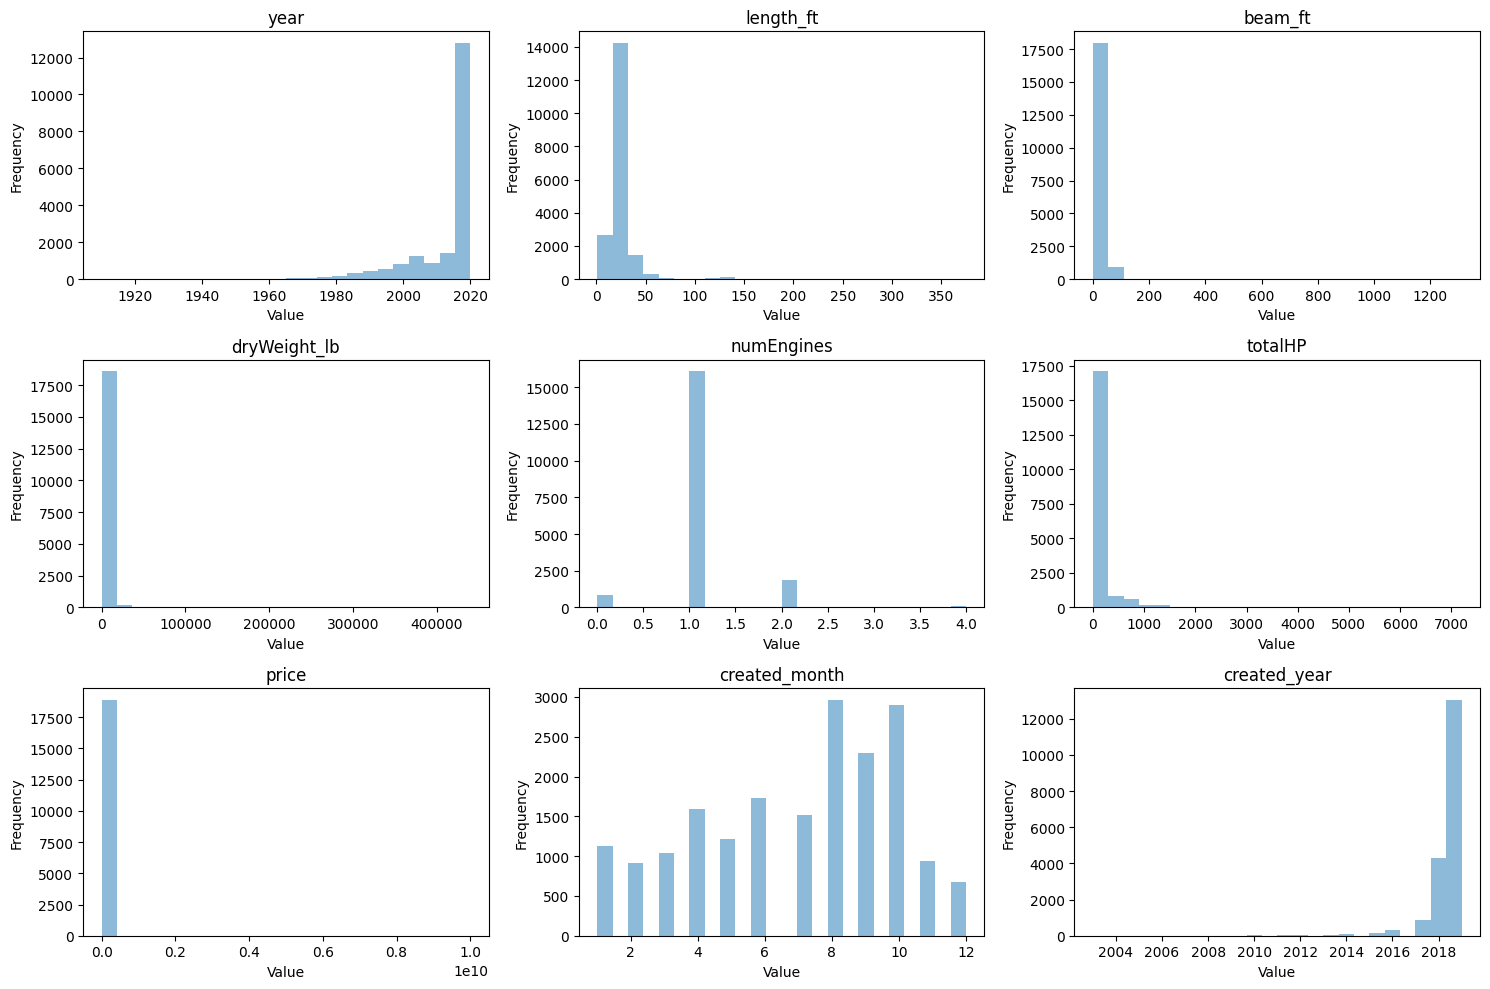

In [8]:
plot_numeric_histograms(data)

* **Boxplot of numerical features**

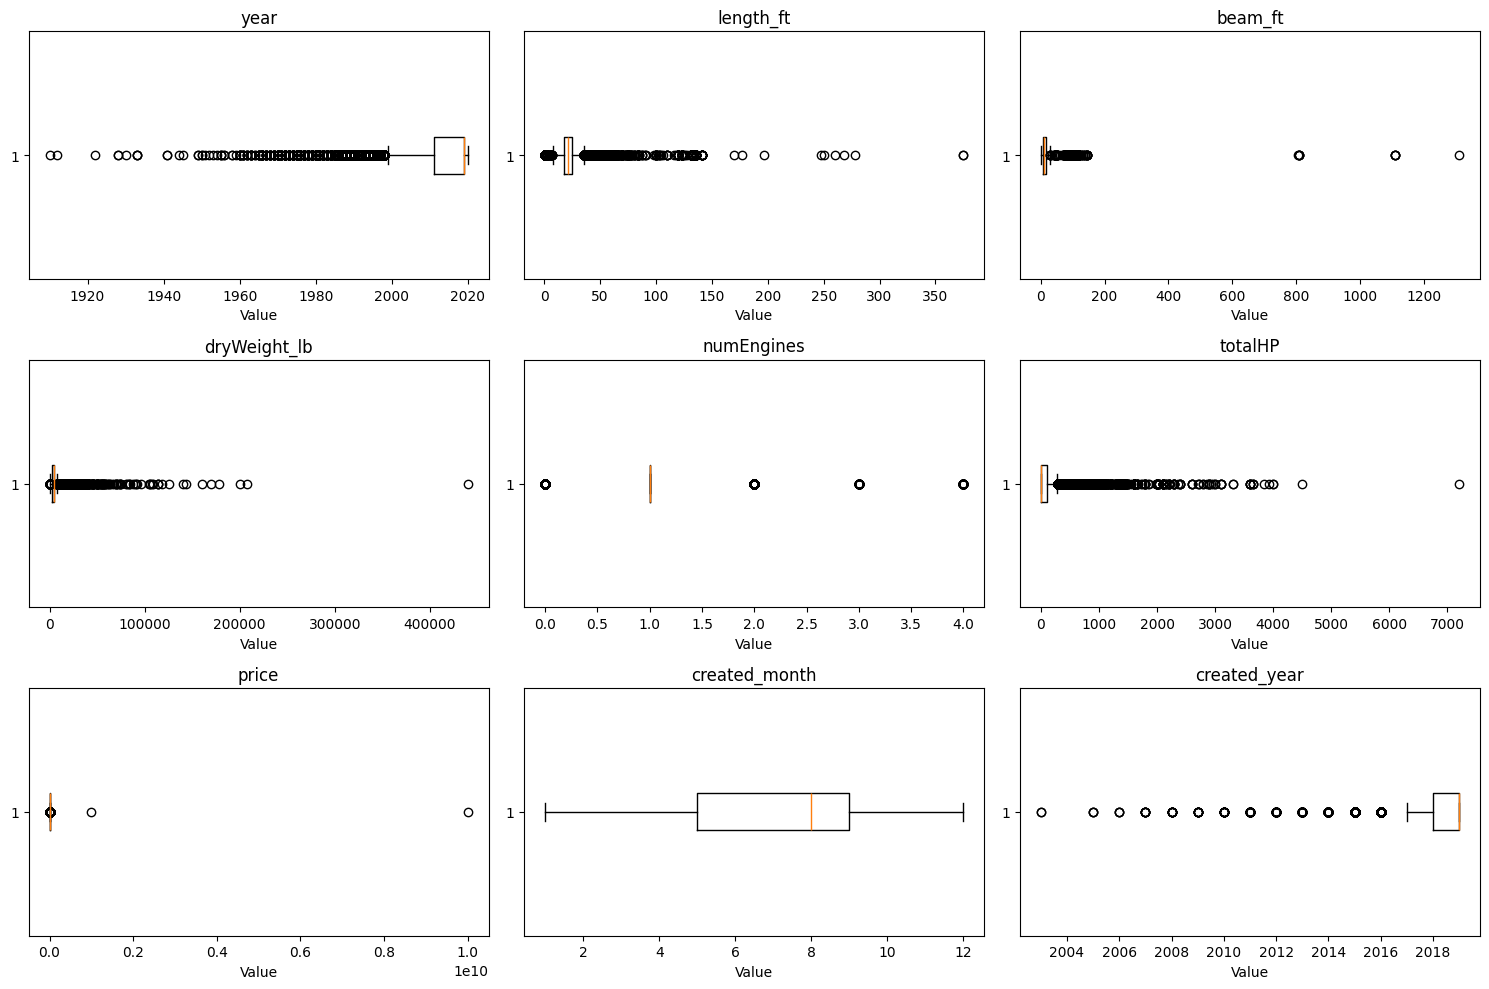

In [9]:
plot_numeric_boxplots(data)

**Actions to be performed:** Since there is a significant number of observations with outliers, records that meet the following conditions will be removed:
- year < 2002
- lenght_ft > 50
- beam_ft > 20
- dryWeight_lb > 7500
- numEngines > 2
- totalHP > 320
- price > 0.2e6
- created_year < 2017

**Observation:** Feature 'totalHP' have 59% of values in 0. 

In [10]:
# Remove rows based on the specified conditions
data = data[(data['year'] >= 2002) &
            (data['length_ft'] <= 50) &
            (data['beam_ft'] <= 20) &
            (data['dryWeight_lb'] <= 7500) &
            (data['numEngines'] <= 2) &
            (data['totalHP'] <= 320) &
            (data['price'] <= 0.2e6) &
            (data['created_year'] >= 2017)]

In [11]:
data.shape

(13590, 21)

In [12]:
print('The initial row count was', initial_rows, 'After the operation, it reduced to', data.shape[0], 'representing', data.shape[0]*100 // initial_rows, '% of the original count.')

The initial row count was 18903 After the operation, it reduced to 13590 representing 71 % of the original count.


### **Categorical features**

* **Total categories per feature**

In [13]:
# Filter features of type 'object'
object_features = data.select_dtypes(include=['object'])

# Calculate the total number of unique categories for each feature
category_counts = object_features.nunique()

print("Total categories per feature:")
print(category_counts)

Total categories per feature:
type                 3
boatClass           55
make               474
model             5209
condition            2
hullMaterial         9
fuelType             5
engineCategory      10
city               752
state               47
zip                652
created_date       805
dtype: int64


* **Bar plots of categorical features**

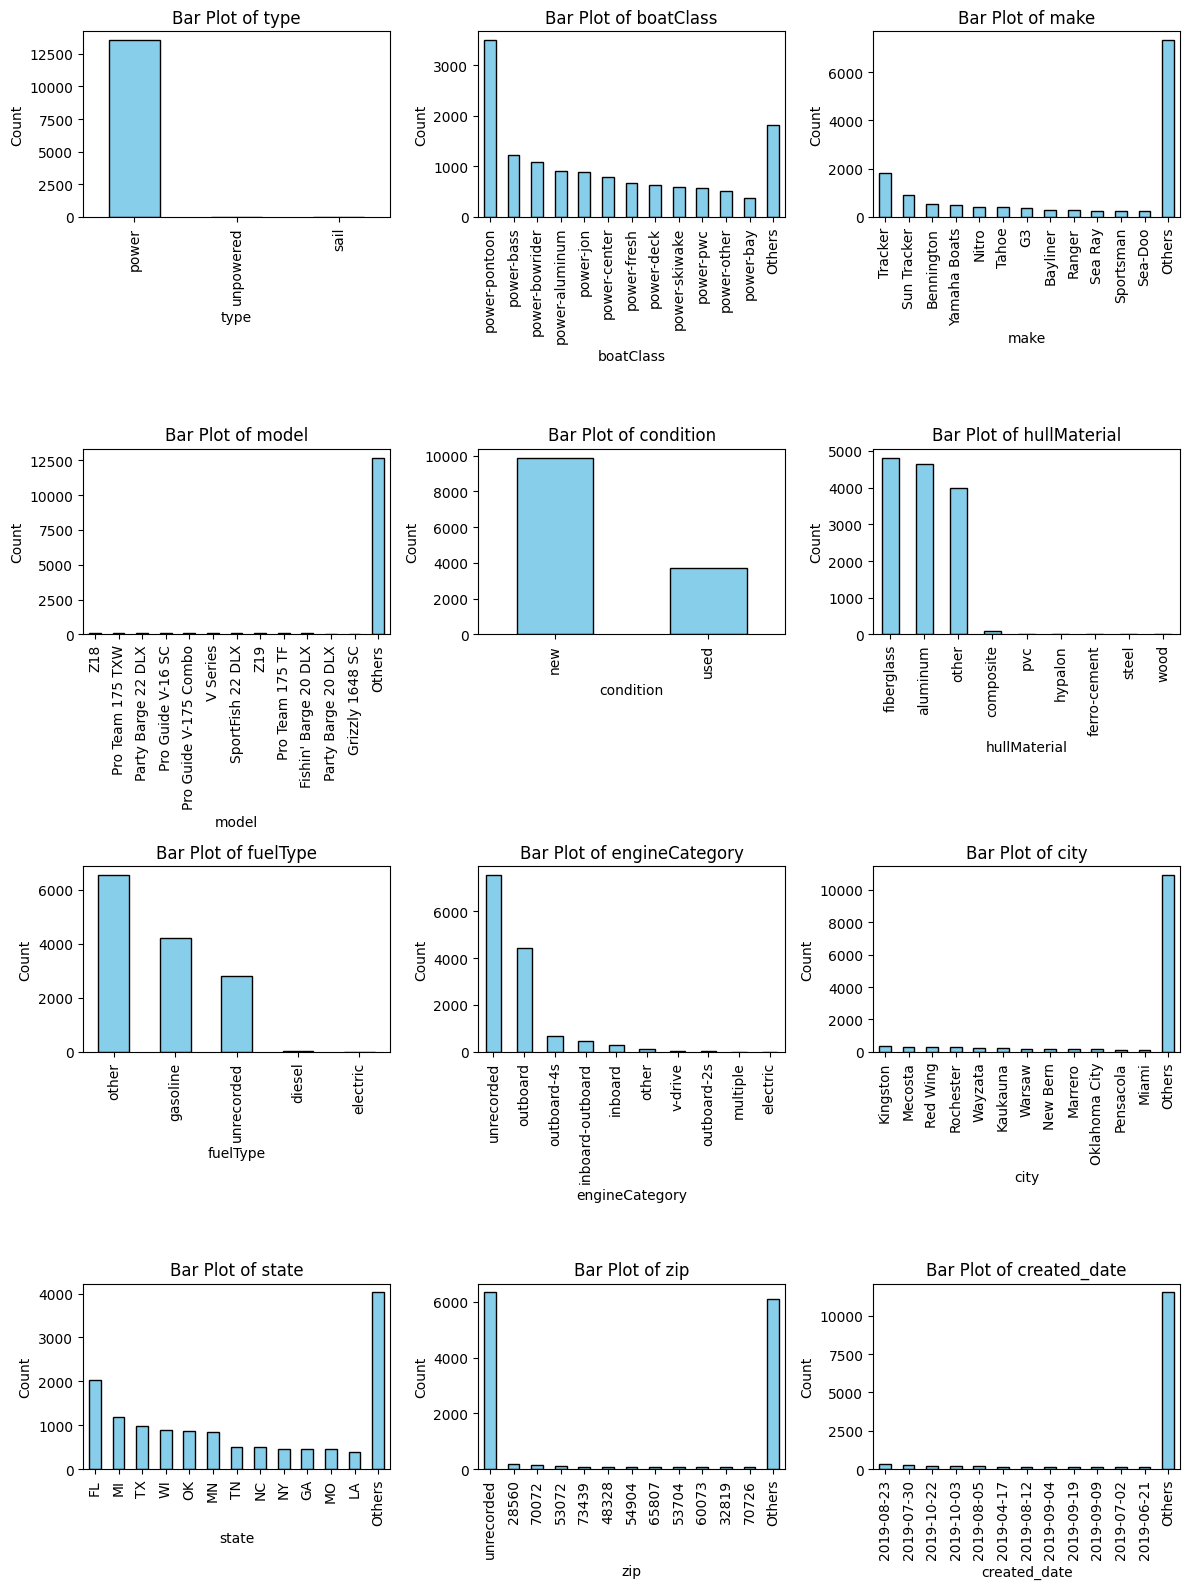

In [14]:
# Create bar plots for categorical variables
plot_categorical_barplots(data)

**Actions to be performed:**

(NA) **type:** keep 'power' remove 'unpowered' and 'sail'.

(M) **boatClass:** no changes.

(M) **make:** no changes.

(M) **model:** no changes.

(M) **condition:** dummies.

(M) **hullMaterial:** keep 'fiberglass' 'aluminum' and merge the rest in 'other' and dummies.

(M) **fuelType:** merge 'diesel' y 'electric' in other and dummies.

(M) **engineCategory:** keep 'unrecorded' and 'outboard' and merge the rest in 'other' and dummies.

(OA) **city, state and zip:** places.

(OA) **created_date:** date.

In [15]:
categorical_model_complex = ['boatClass', 'make', 'model']
categorical_model_simple = ['condition', 'hullMaterial', 'fuelType', 'engineCategory']
categorical_place_analysis = ['city', 'state', 'zip'] 
categorical_date_analysis = ['created_year']

In [16]:
# Define the categories to keep for 'hullMaterial'
categories_to_keep_hull = ['fiberglass', 'aluminum']
# Replace categories not in the list with 'other'
data['hullMaterial'] = data['hullMaterial'].apply(lambda x: x if x in categories_to_keep_hull else 'other')

# Define the categories to merge into 'other' for 'fuelType'
categories_to_merge_fuel = ['diesel', 'electric']
# Replace categories to merge with 'other'
data['fuelType'] = data['fuelType'].apply(lambda x: x if x not in categories_to_merge_fuel else 'other')

# Define the categories to keep for 'engineCategory'
categories_to_keep_engine = ['unrecorded', 'outboard']
# Replace categories not in the list with 'other'
data['engineCategory'] = data['engineCategory'].apply(lambda x: x if x in categories_to_keep_engine else 'other')

### **Validate data processing**

Visualization of the data distribution by feature after removing outliers and reducing the categories of three features (hullMaterial, fuelType, engineCategory).

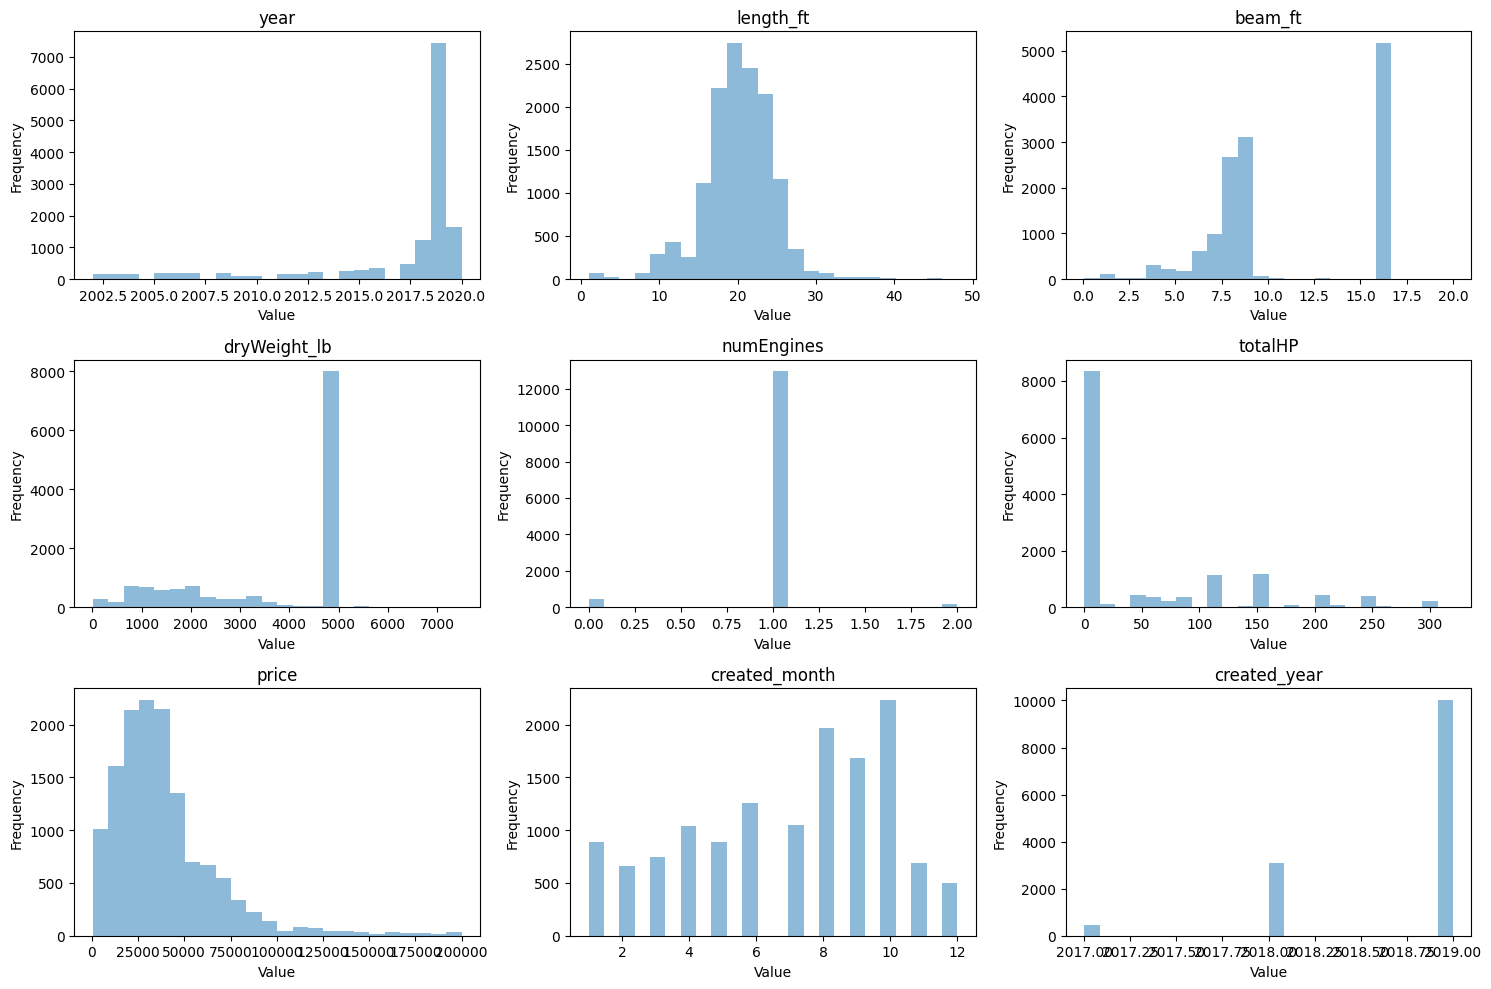

In [17]:
plot_numeric_histograms(data)

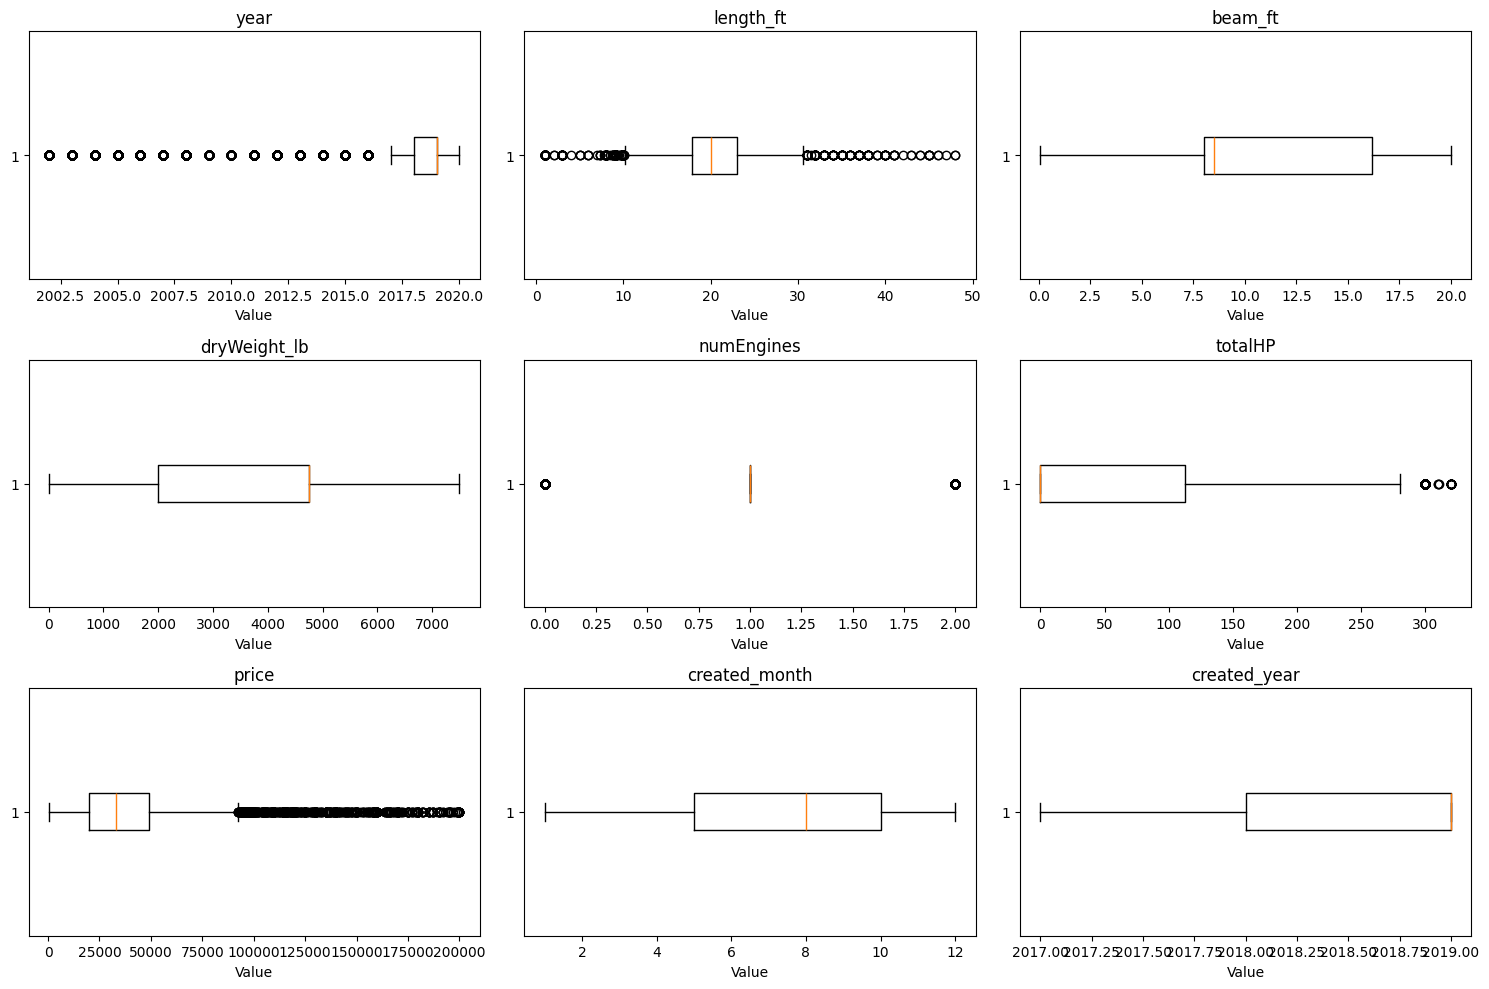

In [18]:
plot_numeric_boxplots(data)

In [19]:
# Filter features of type 'object'
object_features = data.select_dtypes(include=['object'])

# Calculate the total number of unique categories for each feature
category_counts = object_features.nunique()

print("Total categories per feature:")
print(category_counts)

Total categories per feature:
type                 3
boatClass           55
make               474
model             5209
condition            2
hullMaterial         3
fuelType             3
engineCategory       3
city               752
state               47
zip                652
created_date       805
dtype: int64


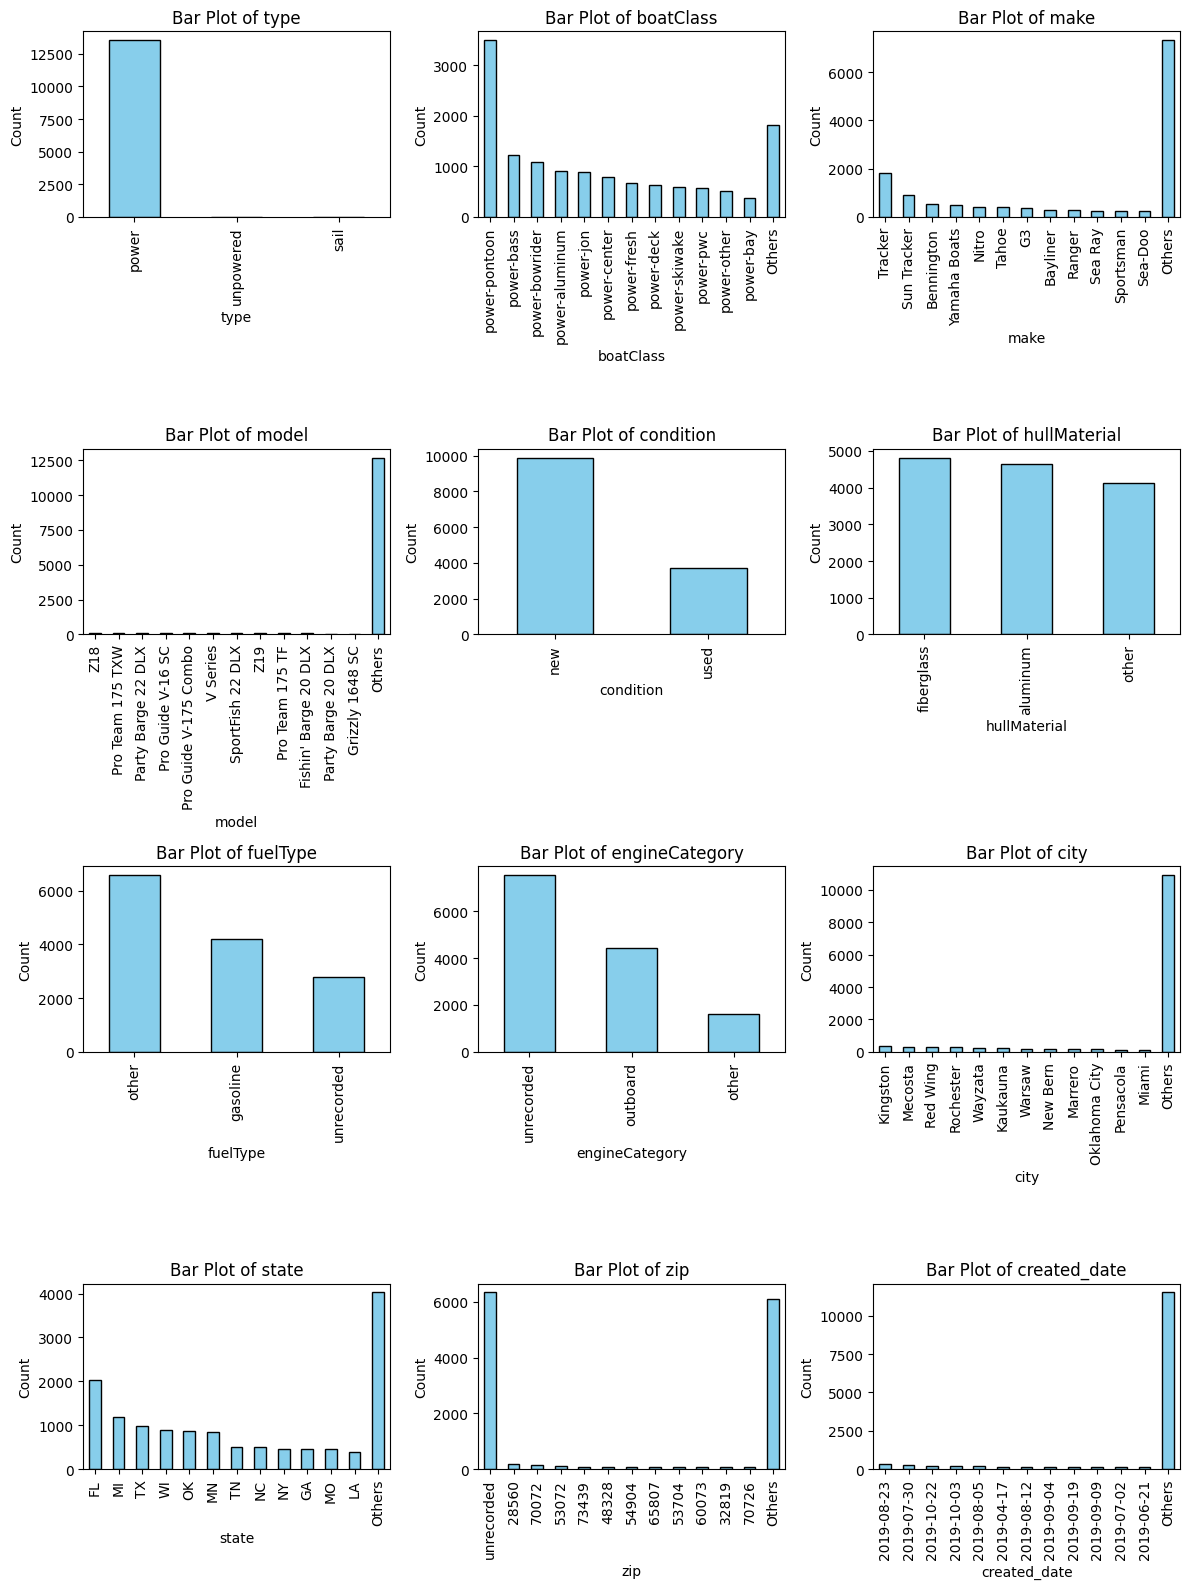

In [20]:
plot_categorical_barplots(data)

## **3.) Final transformations**
Convert the selected features into dummy variables and normalize the numerical features.

In [21]:
# Convert categorical features into dummy variables with corresponding prefix
for feature in categorical_model_simple:
    prefix_name = feature + '_'  # Adding the feature name as prefix
    data = pd.get_dummies(data, columns=[feature], prefix=prefix_name, dtype=int)

In [22]:
# Select only the numeric columns for normalization
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the selected data
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13590 entries, 2 to 18902
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   type                        13590 non-null  object 
 1   boatClass                   13590 non-null  object 
 2   make                        13590 non-null  object 
 3   model                       13590 non-null  object 
 4   year                        13590 non-null  float64
 5   length_ft                   13590 non-null  float64
 6   beam_ft                     13590 non-null  float64
 7   dryWeight_lb                13590 non-null  float64
 8   numEngines                  13590 non-null  float64
 9   totalHP                     13590 non-null  float64
 10  price                       13590 non-null  float64
 11  city                        13590 non-null  object 
 12  state                       13590 non-null  object 
 13  zip                         13590 no

In [24]:
data.head(8)

,type,boatClass,make,model,year,length_ft,beam_ft,dryWeight_lb,numEngines,totalHP,price,city,state,zip,created_date,created_month,created_year,condition__new,condition__used,hullMaterial__aluminum,hullMaterial__fiberglass,hullMaterial__other,fuelType__gasoline,fuelType__other,fuelType__unrecorded,engineCategory__other,engineCategory__outboard,engineCategory__unrecorded
2,power,power-deck,Bayliner,Element 180,1.000000,0.361702,0.368474,0.265884,0.5,0.234375,0.132724,Marietta,OH,45750,2019-11-02,0.909091,1.0,1,0,0,1,0,1,0,0,1,0,0
12,power,power-pontoon,Starcraft,EXS-3 Sport,0.944444,0.482979,0.422691,0.279231,0.5,0.625000,0.220512,Selbyville,DE,19975,2019-02-13,0.090909,1.0,1,0,1,0,0,1,0,0,1,0,0
16,power,power-bay,Xpress,Boats H22B,0.944444,0.446809,0.385040,0.202883,0.5,0.546875,0.182378,Fenton,MI,48430,2018-11-27,0.909091,0.5,1,0,1,0,0,1,0,0,0,1,0
17,power,power-bay,Xpress,Boats H20B,0.944444,0.404255,0.385040,0.190603,0.5,0.359375,0.112196,Fenton,MI,48430,2018-11-27,0.909091,0.5,1,0,1,0,0,1,0,0,0,1,0
26,power,power-pontoon,Sun Tracker,Party Barge 24 DLX,0.944444,0.535532,0.422691,0.292579,0.5,0.468750,0.174658,Fairland,IN,46126,2018-08-18,0.636364,0.5,1,0,1,0,0,0,0,1,0,1,0
27,power,power-pontoon,Sun Tracker,Party Barge 18 DLX,0.944444,0.404255,0.406124,0.198478,0.5,0.187500,0.109514,Fairland,IN,46126,2019-05-20,0.363636,1.0,1,0,1,0,0,0,0,1,0,1,0
30,power,power-center,Sea Fox,239 Center Console,0.722222,0.489362,0.422691,0.633495,0.5,0.625000,0.297677,Fort Pierce,FL,34949,2019-01-17,0.000000,1.0,0,1,0,1,0,1,0,0,1,0,0
32,power,power-center,Angler,Grande Bay 22,0.277778,0.446809,0.422691,0.332621,0.5,0.625000,0.129742,Fort Pierce,FL,34949,2019-06-25,0.454545,1.0,0,1,0,1,0,1,0,0,1,0,0


In [25]:
# Export the DataFrame as a CSV file
data.to_csv("../data/results_processing.csv", index=False)